In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn import datasets

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# # lê-se o dataset expandido (TENSORFLOW)
# mnist = tf.keras.datasets.mnist
# (X_train, y_train),(X_test, y_test) = mnist.load_data()

# def reshape(data):
#     nsamples, nx, ny = data.shape
#     return data.reshape((nsamples,nx*ny))

# # transforma-se as matrizes em vetores
# X_train = reshape(X_train)
# X_test = reshape(X_test)

# X = np.concatenate((X_train, X_test), axis=0)
# y = np.concatenate((y_train, y_test), axis=0)

# lê-se o dataset 
X,y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
folds = 5
scores = np.array([])

kf = KFold(n_splits=folds)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index].astype('float32'), X[test_index].astype('float32')
    y_train, y_test = y[train_index].astype('float32'), y[test_index].astype('float32')
    
    # PCA
    pca = PCA(0.99)
    pca.fit(X_train)

    # aplica-se a PCA buscando manter uma parte da variância de forma a diminuir o número de compononentes
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    # KMeans
    n_clusters = 20
    clustered_X_train = np.empty((0, X_train.shape[1]))
    clustered_y_train = np.array([])
    for label in set(y):
        kmeans = KMeans(n_clusters=n_clusters).fit(X_train[np.where(y_train == label)])
        clustered_X_train = np.append(clustered_X_train, kmeans.cluster_centers_, axis=0)
        clustered_y_train = np.append(clustered_y_train, label*np.ones(n_clusters))
    
    # Regressão Logistica
    clf = svm.SVC(gamma=0.0005, decision_function_shape='ovo')
    clf.fit(clustered_X_train, clustered_y_train)
    scores = np.append(scores, clf.score(X_test, y_test))

print(f'{np.mean(scores)} +- {np.std(scores)}')

0.9438115134633241 +- 0.02714514511894667


[-3.38996099e+09]
[-3.38996099e+09 -2.98293526e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.6144020

[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09 -2.74161745e+09 -2.57200520e+09
 -2.63837792e+09 -2.67845465e+09 -2.59590930e+09 -2.68600464e+09
 -2.66668200e+09 -2.59930804e+09 -2.67820001e+09 -2.64473343e+09
 -2.66364884e+09 -2.67185476e+09 -2.67967661e+09 -2.69118936e+09
 -2.70469677e+09 -2.68404031e+09 -2.65641817e+09 -2.68136000e+09
 -2.70496868e+09 -2.70199909e+09 -2.72340621e+09 -2.70638428e+09
 -2.67947546e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09 -2.74161745e+09 -2.57200520e+09
 -2.63837792e+09 -2.67845465e+09 -2.59590930e+09 -2.68600464e+09
 -2.66668200e+09 -2.59930804e+09 -2.67820001e+09 -2.64473343e+09
 -2.66364884e+09 -2.67185476e+09 -2.67967661e+09 -2.69118936e+09
 -2.70469677e+09 -2.68404031e+09 -2.65641817e+09 -2.68136000e+09
 -2.704

[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09 -2.74161745e+09 -2.57200520e+09
 -2.63837792e+09 -2.67845465e+09 -2.59590930e+09 -2.68600464e+09
 -2.66668200e+09 -2.59930804e+09 -2.67820001e+09 -2.64473343e+09
 -2.66364884e+09 -2.67185476e+09 -2.67967661e+09 -2.69118936e+09
 -2.70469677e+09 -2.68404031e+09 -2.65641817e+09 -2.68136000e+09
 -2.70496868e+09 -2.70199909e+09 -2.72340621e+09 -2.70638428e+09
 -2.67947546e+09 -2.71206528e+09 -2.70934198e+09 -2.72500198e+09
 -2.76396900e+09 -2.73720995e+09 -2.71079513e+09 -2.76567735e+09
 -2.73820789e+09 -2.75357936e+09 -2.76973122e+09 -2.75599949e+09
 -2.77321465e+09 -2.76475053e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09 -2.74161745e+09 -2.57200520e+09
 -2.63837792e+09 -2.67845465e+09 -2.59590930e+09 -2.6860

[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.61440201e+09 -2.61528068e+09 -2.68823304e+09
 -2.63597865e+09 -2.61548638e+09 -2.74161745e+09 -2.57200520e+09
 -2.63837792e+09 -2.67845465e+09 -2.59590930e+09 -2.68600464e+09
 -2.66668200e+09 -2.59930804e+09 -2.67820001e+09 -2.64473343e+09
 -2.66364884e+09 -2.67185476e+09 -2.67967661e+09 -2.69118936e+09
 -2.70469677e+09 -2.68404031e+09 -2.65641817e+09 -2.68136000e+09
 -2.70496868e+09 -2.70199909e+09 -2.72340621e+09 -2.70638428e+09
 -2.67947546e+09 -2.71206528e+09 -2.70934198e+09 -2.72500198e+09
 -2.76396900e+09 -2.73720995e+09 -2.71079513e+09 -2.76567735e+09
 -2.73820789e+09 -2.75357936e+09 -2.76973122e+09 -2.75599949e+09
 -2.77321465e+09 -2.76475053e+09 -2.76374497e+09 -2.76832949e+09
 -2.76179313e+09 -2.78100832e+09 -2.76451589e+09 -2.77743002e+09
 -2.76419875e+09 -2.77926875e+09 -2.78177334e+09 -2.77631426e+09]
[-3.38996099e+09 -2.98293526e+09 -2.82287929e+09 -2.69854009e+09
 -2.76276100e+09 -2.6144

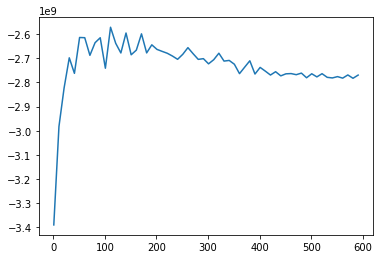

In [11]:
clusters = np.array(range(1, 100, 10))
scores = np.array([])
# Find optimal number of clusters
for c in clusters:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    kmeans = KMeans(n_clusters=c).fit(X_train[np.where(y_train == 0)])
    scores = np.append(scores, kmeans.score(X_test[np.where(y_train == 0)]))
    print(scores)

plt.plot(clusters, scores)